In [6]:
import multiprocessing

# Get the number of CPUs
num_cpus = multiprocessing.cpu_count()
print(f'Number of CPUs: {num_cpus}')

Number of CPUs: 8


### Dependencies ###

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data exploration and preprocessing ###

In [9]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

train.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

In [11]:
train.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [12]:
train.isnull().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [13]:
X = train.drop(columns=['id', 'cost'])
y = train['cost']

In [14]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test.drop(columns=['id']))

### Model training and evaluation ###

In [15]:
# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

In [16]:
# Create a function for RMSLE (for cross validation)
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [17]:
# Train and evaluate the models
results = []

for name, model in models:
    # Train and evaluate the model using cross-validation
    scores = -cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1)
    rmsle_scores = np.sqrt(scores)
    
    # Print the results
    print(f'{name} - Mean RMSLE: {rmsle_scores.mean():.5f}, Std: {rmsle_scores.std():.5f}')
    
    # Save the results
    results.append((name, rmsle_scores))

Linear Regression - Mean RMSLE: 0.31694, Std: 0.00072
Decision Tree - Mean RMSLE: 0.41964, Std: 0.00070
Random Forest - Mean RMSLE: 0.30952, Std: 0.00045
Gradient Boosting - Mean RMSLE: 0.30880, Std: 0.00082
XGBoost - Mean RMSLE: 0.30230, Std: 0.00072


In [20]:
models.append(('AdaBoost', AdaBoostRegressor(random_state=42)))

# Train and evaluate the new models
for name, model in models[-1:]:
    # Train and evaluate the model using cross-validation
    scores = -cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1)
    rmsle_scores = np.sqrt(scores)
    
    # Print the results
    print(f'{name} - Mean RMSLE: {rmsle_scores.mean():.5f}, Std: {rmsle_scores.std():.5f}')
    
    # Save the results
    results.append((name, rmsle_scores))

AdaBoost - Mean RMSLE: 0.31297, Std: 0.00068


In [27]:
model_eval_results['Mean RMSLE'] = model_eval_results['RMSLE Scores'].apply(lambda x: x.mean())
model_eval_results['Std RMSLE'] = model_eval_results['RMSLE Scores'].apply(lambda x: x.std())

# drop duplicates and sort by mean RMSLE
model_eval_results = model_eval_results.drop_duplicates(subset=['Model']).sort_values(by='Mean RMSLE')

# fix the index
model_eval_results.reset_index(drop=True, inplace=True)

# save the results
model_eval_results.to_csv('model_eval_results.csv', index=False)

In [31]:
model_eval_results[['Model', 'Mean RMSLE', 'Std RMSLE']]

,Model,Mean RMSLE,Std RMSLE
0,XGBoost,0.302298,0.000721
1,Gradient Boosting,0.308795,0.000819
2,Random Forest,0.309515,0.000452
3,AdaBoost,0.312967,0.000678
4,Linear Regression,0.316943,0.000724
5,Decision Tree,0.419641,0.000702


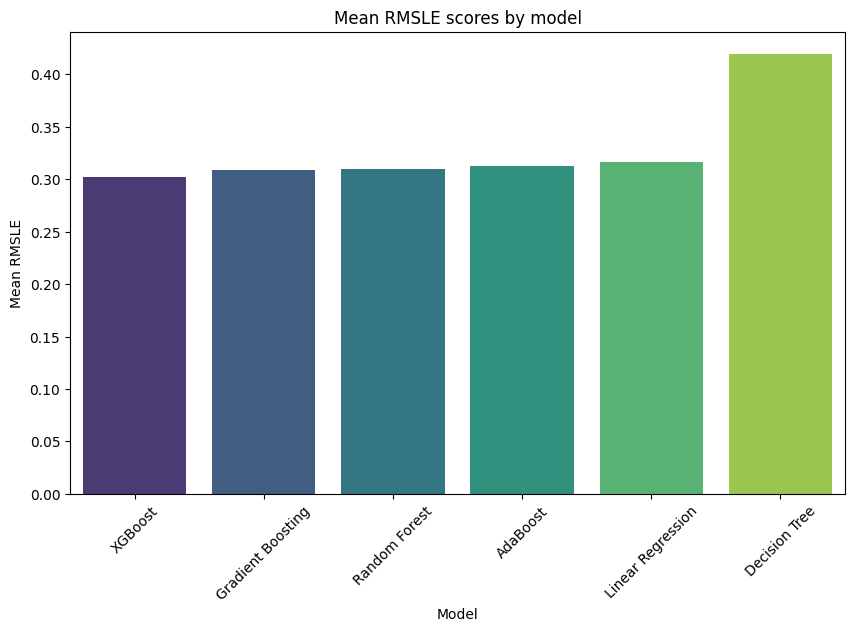

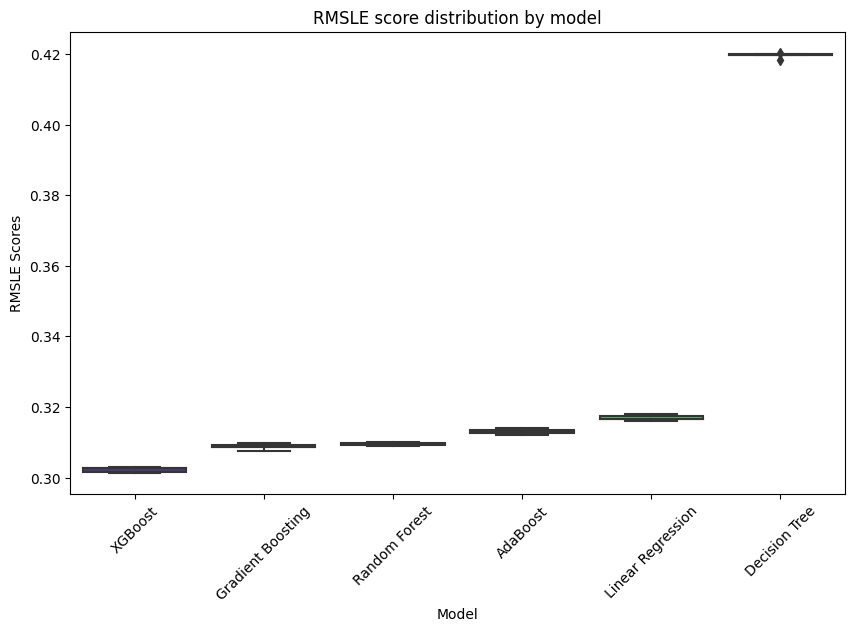

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean RMSLE', data=model_eval_results, palette='viridis')
plt.xticks(rotation=45)
plt.title('Mean RMSLE scores by model')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='RMSLE Scores', data=model_eval_results.explode('RMSLE Scores'), palette='viridis')
plt.xticks(rotation=45)
plt.title('RMSLE score distribution by model')
plt.show()

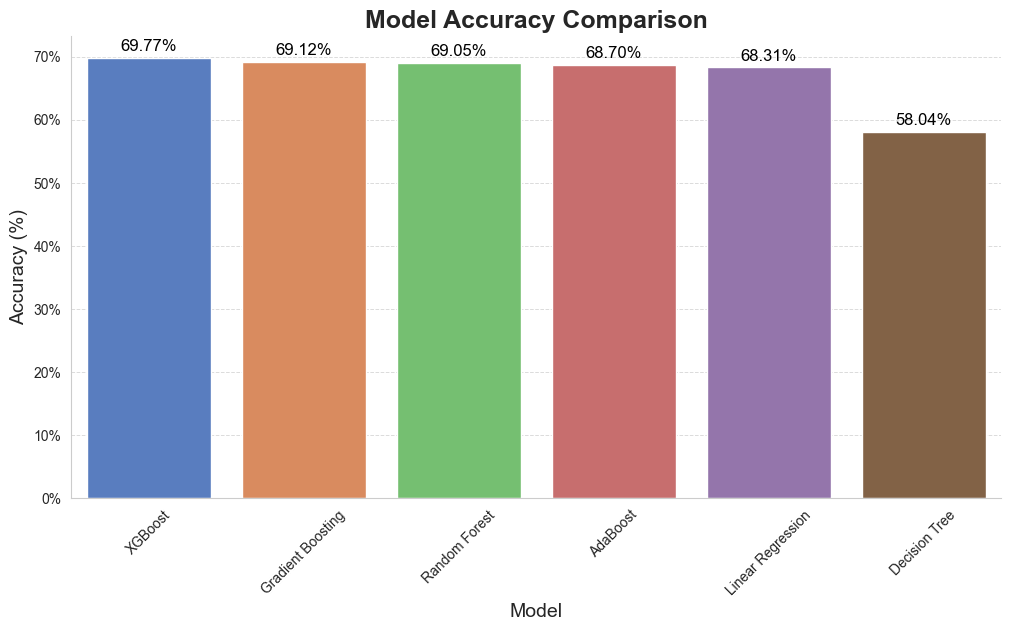

In [30]:
import matplotlib.ticker as mticker

model_eval_results['Accuracy'] = 100 - (model_eval_results['Mean RMSLE'] * 100)

sns.set_style("whitegrid")
sns.set_palette("muted")

plt.figure(figsize=(12, 6))
accuracy_plot = sns.barplot(x='Model', y='Accuracy', data=model_eval_results)
plt.xticks(rotation=45)
plt.title('Model Accuracy Comparison', fontsize=18, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)

# Add percentage values on top of each bar
for p in accuracy_plot.patches:
    accuracy_plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                            textcoords='offset points')

# Customize the y-axis ticks to show percentage
accuracy_plot.yaxis.set_major_formatter(mticker.PercentFormatter())

# Add additional gridlines for easier reading
accuracy_plot.yaxis.grid(True, linestyle='--', which='both', linewidth=0.7, alpha=0.7)

# Remove the borders on the top and right side
sns.despine(top=True, right=True, left=False, bottom=False)

# Save the chart as an image file
plt.savefig('model_accuracy_comparison.png', dpi=300, bbox_inches='tight')

# Display the chart
plt.show()


### Model selection and reasoning ###

Based on the provided scores, I would recommend going with the XGBoost model, as it has the lowest Mean RMSLE score of 0.302298. This means that, on average, the XGBoost model has the best performance in terms of the Root Mean Squared Log Error metric when compared to the other models. Additionally, the standard deviation of the RMSLE scores is relatively low (0.000721), indicating that the XGBoost model performs consistently across different validation sets.

To further improve the performance of the models, several strategies can be considered:

1. Hyperparameter tuning: Perform a grid search or randomized search to find the optimal set of hyperparameters for the XGBoost and Gradient Boosting models. This process could potentially lead to better performance by fine-tuning the models for the specific problem at hand.

2. Feature engineering: Investigate if there are any additional features that can be derived from the existing dataset or if any of the existing features can be transformed to better capture the relationships within the data.

3. Feature selection: Analyze the feature importances of the models and remove any features that have low importance, as they may not contribute much to the prediction and may even introduce noise.

4. Ensembling: Combine the predictions of multiple models, such as XGBoost and Gradient Boosting, to create a more robust prediction. This can be achieved through methods like stacking or averaging the predictions of individual models.

5. Synthesized data: If the dataset is small, generating additional synthetic data through techniques like SMOTE or bootstrapping could help improve the models' performance.

### Get predictions ###

In [34]:
import pickle

# Select the best model (XGBoost) from the model_eval_results DataFrame
best_model_name, best_model = models[model_eval_results['Mean RMSLE'].idxmin()]

print(f"Selected model: {best_model_name}")

# Train the best model on the entire training dataset
best_model.fit(X_scaled, y)

# Make predictions on the test dataset using the best model
test_predictions = best_model.predict(test_scaled)

# Ensure all predicted values are positive
test_predictions = np.clip(test_predictions, 0, None)

# Create a submission file in the required format (id, cost)
submission = pd.DataFrame({"id": test["id"], "cost": test_predictions})
submission.to_csv("submission.csv", index=False)

# Save the XGBoost model as a pickle file
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

Selected model: Linear Regression


In [35]:
submission.head()

,id,cost
0,360336,104.724609
1,360337,98.724370
2,360338,100.920314
3,360339,95.616146
4,360340,94.330404


In [37]:
# Save the scaler as a pickle file
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [38]:
!pip install pipreqs

  Using cached docopt-0.6.2.tar.gz (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for docopt: started
  Running setup.py install for docopt: finished with status 'done'


  DEPRECATION: docopt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [43]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
